# Butterfly options portfolio

In his note we consider a number of options portfolios, and approaches to computing their payoff distribution. The portfolio types are

<ul>
<li>Long call butterfly</li>
<li>Long put butterfly</li>
</ul>

Approaches to computing payoff distribution include

<ul>
<li>Historic simulation</li>
<li>Monte Carlo simulation</li>
<li>Analytic Delta method</li>
</ul>

## Options payoff

Let $K$ be the option strike price, and $S$ denote the underlying price. If call option price is $c$, and put option price is $p$ (all prices discounted to present time), then payoff functions of long call and put options are

$$
C(S)=\max(0,S-K)-c=(S-K)_+-c,\;\;\;P(S)=\max(0,K-S)-p=(K-S)_+-p.
$$

Payoff of a short position equals to the negative payoff of the corresponding long position.

## Butterfly strategies

### Long call butterfly

This strategy consists in buying a call option with high strike $K_h$, a call option with low strike $K_l$, and selling two call options with intermediate strike $K_m$, so that $K_l<K_m<K_h$, and corresponding prices satisfy inequalities $c_l>c_m>c_h$. The payoff of this portfolio equals

$$
BC(S) = 2c_m-(c_l+c_h)+(S-K_l)_++(S-K_h)_+-2(S-K_m)_+=\left\{
\begin{array}{ll}
2c_m-(c_l+c_h),& S\leq K_l,\\
(S-K_l)+2c_m-(c_l+c_h),&K_l\leq S\leq K_m,\\
(2K_m-K_l-S)+2c_m-(c_l+c_h),&K_m\leq S\leq K_h,\\
(2K_m-K_l-K_h)+2c_m-(c_l+c_h),&K_h\leq S.
\end{array}
\right.
$$

Maximum payoff is attained at $S=K_m$ and equals to $BC(K_m)=K_m-K_l+2c_m-(c_l+c_h)$. Zero payoff is attained at two points $S_0^l=K_l+(c_l+c_h-2c_m)$ and $S_0^h=2K_m-K_l-(c_l+c_h-2c_m)$; payoff is positive for $S\in(S_0^l,S_0^h)$, and is negative outside the interval.

### Long put butterfly

This strategy consists in buying a put option with high strike $K_h$, a put option with low strike $K_l$, and selling two put options with intermediate strike $K_m$, so that $K_l<K_m<K_h$, and corresponding prices satisfy inequalities $p_l<p_m<p_h$. The payoff of this portfolio equals

$$
BP(S) = 2p_m-(p_l+p_h)+(K_l-S)_++(K_h-S)_+-2(K_m-S)_+=\left\{
\begin{array}{ll}
(K_l+K_h-2K_m)+2p_m-(p_l+p_h),&S\leq K_l,\\
(S+K_h-2K_m)+2p_m-(p_l+p_h),&K_l\leq S\leq K_m,\\
(K_h-S)+2p_m-(p_l+p_h),&K_m\leq S\leq K_h,\\
2p_m-(p_l+p_h),& K_h\leq S.
\end{array}
\right.
$$

Maximum payoff is attained at $S=K_m$ and equals to $BP(K_m)=K_h-K_m+2p_m-(p_l+p_h)$. Zero payoff is attained at two points $S_0^l=2K_m-K_h+(p_l+p_h-2p_m)$ and $S_0^l=K_h-(p_l+p_h-2p_m)$; payoff is positive for $S\in(S_0^l,S_0^h)$, and is negative outside the interval.

### Put-call parity

One can easily show that because of put-call parity values of call butterfly portfolio and put butterfly portfolio coincide, that is

$$
BC(S)=BP(S),\;\;S\geq0.
$$

## Code

In [1]:
# importing tools we need
import pandas as pd
%pylab inline
from scipy.stats import norm
# import options_stuff as ost
import options_classes as ocl
labels = ocl.make_label_dict()

Populating the interactive namespace from numpy and matplotlib


In [2]:
# global variables
risk_free_rate = 0.01

# describe current underlying state
snp500 = 2300

### Options payoff

The following picture presents charts of payoff functions for options with strike price \$100 (written at the money) expiring in 8 months from the current date.

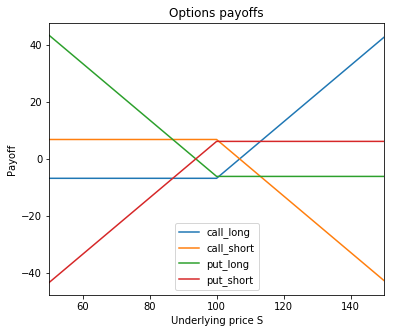

In [3]:
K = 100                          # options strike price $100
cur_s = 100                      # current underlying price $100
vol = 0.2                        # annualized volatility 20%
rf = 0.01                        # risk-free rate 1%
cur_dat = '2017-04-01'           # current date
exp_dat = '2017-12-01'           # expiration date
S = np.linspace(50,150,101)      # underlying price at expiration
figsize(6,5)

port = ocl.Portfolio([ocl.Option(strike=K, call_op=True, expires=exp_dat, volume=1),
                      ocl.Option(strike=K, call_op=True, expires=exp_dat, volume=-1),
                      ocl.Option(strike=K, call_op=False, expires=exp_dat, volume=1),
                      ocl.Option(strike=K, call_op=False, expires=exp_dat, volume=-1)])

for op in port:
    po = op.payoff(cur_s, S, vol, rf, cur_dat)
    po.plot(label=op.legend_label())
    po.to_csv('csv/{0}.csv'.format(op.legend_label()), header=True)

xlabel(ocl.x_pay_lab)
ylabel(ocl.y_pay_lab)
title(ocl.pay_tit)
le = legend()
# savefig('images/opt_payoffs.png')

### Butterfly payoff

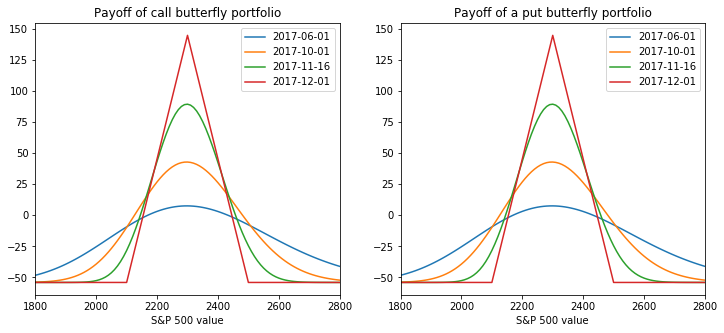

In [4]:
def butterfly_payoffs(bu, tit, dats):
    """ """
    df = pd.DataFrame()
    for dat in dats:
        po = bu.payoff(snp500, ss, vol, rf, cur_dat, dat)
        po.plot(label=dat)
        df[dat] = po
    ti = title(tit)
    le = legend()
    return df

# set up SnP 500 value range for charts
snp500 = 2300
ddel = 500
ss = pd.Series(np.linspace(snp500 - ddel, snp500 + ddel, 101), name=ocl.snp500_xlabel)

# market conditions
vol = 0.15                      # annualized volatility
rf = 0.01                       # risk-free rate

# options parameters
spr = 100                       # options strike spread
cur_dat = '2017-04-01'          # current date
exp_dat = '2017-12-01'          # expiration date
Kl, Km, Ku = snp500 - 2 * spr, snp500, snp500 + 2 * spr

# butterfly portfolios
buc = ocl.butterfly(Kl, Km, Ku, call_ops=True, expir=exp_dat, vlm=1)
bup = ocl.butterfly(Kl, Km, Ku, call_ops=False, expir=exp_dat, vlm=1)

# charts
figsize(12,5)
dats = ['2017-06-01', '2017-10-01', '2017-11-16', '2017-12-01']
subplot(1,2,1)
dfc = butterfly_payoffs(buc, ocl.buc_payoff_plot_title, dats)
subplot(1,2,2)
dfp = butterfly_payoffs(bup, ocl.bup_payoff_plot_title, dats)

# save results
dfc.to_csv('csv/butt_call_payoff.csv')
dfp.to_csv('csv/butt_put_payoff.csv')
savefig('images/butt_call_put_payoff.png')

## Distribution of butterfly payoff

### Generic procedure

In [5]:
def simulate_it(hist=True):
    """ generic simulation procedure """
    # read the S&P 500 data
    snp = ocl.SnP500_data()

    # last date values as a start for forecasting
    snp500 = snp.last_value()

    # use mean annual volatility for 5 last years as a model volatility parameter
    vol = snp.annual_vols().tail().mean()[0]

    # spread for butterfly strikes
    spr = snp500 * vol

    # multiple for spread
    mult = 0.5

    # strikes and dates
    Kl, Km, Ku = snp500 - mult * spr, snp500, snp500 + mult * spr
    exp_dat = '2017-12-01'
    cur_dat = '2017-04-01'

    # calls butterfly portfolio
    buc = ocl.butterfly(Kl, Km, Ku, call_ops=True, expir=exp_dat)

    # calculation dates
    calc_dats = ['2017-09-01','2017-10-01','2017-11-01','2017-12-01']

    # output dataframe templates
    dfo = pd.DataFrame()

    # two plots in one figure
    figsize(12,4)
    
    # suffix in file names
    suff = 'hist' if hist else 'MC'

    # first plot
    subplot(1,2,1)
    for calc_dat in calc_dats:
        # dates difference in calendar and business days
        tot_days = (pd.to_datetime(calc_dat) - pd.to_datetime(cur_dat)).days
        bus_days = int(tot_days / 365 * 250)
    
        if hist:
            # simulate S&P500 values using historic method
            s = snp500 * snp.make_hist_returns(n_paths=5000, n_days=bus_days)[-1, :]
        else:
            s = snp500 * snp.make_mc_returns(n_paths=5000, n_days=bus_days)[-1, :]
    
        # portfolio payoff for all simulates snp500 values
        po = buc.payoff(snp500, s, vol, rf, cur_dat, calc_dat)
        po.name = ocl.port_payoff_lab
    
        # keep descriptive stats for simulated payoffs
        dfo[calc_dat] = po.describe([0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95])
    
        # plot empiric CDF for simulated payoffs
        poe = ocl.ecdf(po)
        poe.plot(label=calc_dat)
        poe.round(3).to_csv('csv/empiric_CDF_{0}_{1}.csv'.format(suff, calc_dat), header=True)
    ti = title(ocl.port_payoff_tit)
    le = legend()

    # now plot the percentiles of payoffs vs the calc date
    dfd = dfo.T.round(3)
    prc = ['50%','75%','90%','95%']
    subplot(1,2,2)
    for pr in prc:
        dfd[pr].plot(label=pr)
    ti = title(ocl.port_perc_tit)
    le = legend()
    savefig('images/cdfs_{0}.png'.format(suff))
    dfd.round(3).to_csv('csv/percentiles_{0}.csv'.format(suff))    

### Historic simulation

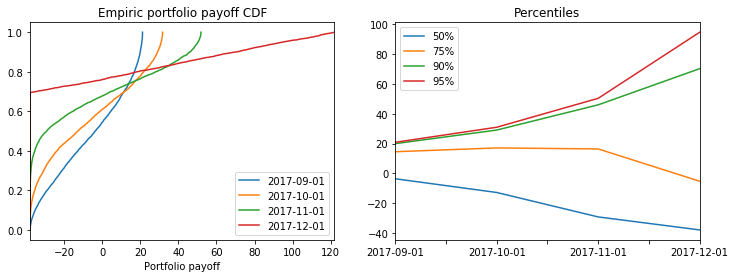

In [6]:
simulate_it(hist=True)

### Monte Carlo simulation

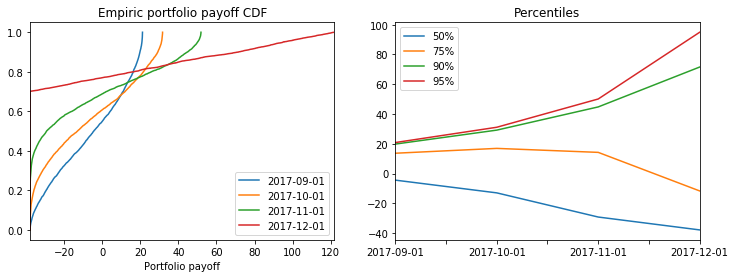

In [7]:
simulate_it(hist=False)

We see that distributions from historic and Monte Carlo simulations are essencially the same. This is due to the fact that S&P 500 index is a weighted average of many stocks behavior, so distribution of its returns is rather close to Gaussian.

## Distribution of portfolio value at a given horizon

Let's compare distribution of future portfolio value, calculated by three methods: Delta method, historic simulation and Monte Carlo simulation.

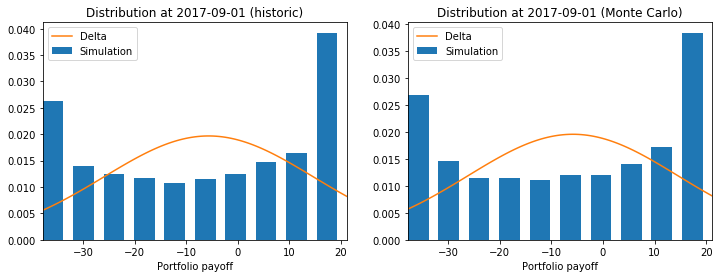

In [8]:
def norm_dens_for(po, nn=101):
    """ normal density for the series po """
    de = po.describe()
    me, st, mi, ma = de['mean'], de['std'], de['min'], de['max']
    xx = np.linspace(mi, ma, nn)
    yy = norm.pdf(xx, me, st)
    return pd.Series(yy, index=xx)

def fin_distr(calc_dat='2017-09-01'):
    """ butterfly portfolio distribution as of future calc_dat """
    # read the S&P 500 data
    snp = ocl.SnP500_data()

    # last date values as a start for forecasting
    snp500 = snp.last_value()

    # use mean annual volatility for 5 last years as a model volatility parameter
    vol = snp.annual_vols().tail().mean()[0]

    # spread for butterfly strikes
    spr = snp500 * vol

    # multiple for spread
    mult = 0.5

    # strikes and dates
    Kl, Km, Ku = snp500 - mult * spr, snp500, snp500 + mult * spr
    exp_dat = '2017-12-01'
    cur_dat = '2017-04-01'

    # calls butterfly portfolio
    buc = ocl.butterfly(Kl, Km, Ku, call_ops=True, expir=exp_dat)

    tot_days = (pd.to_datetime(calc_dat) - pd.to_datetime(cur_dat)).days
    bus_days = int(tot_days / 365 * 250)
    hor = tot_days / 365          # horizon in years
    
    # simulate S&P500 values using historic and Monte Carlo mathods
    s_hist = snp500 * snp.make_hist_returns(n_paths=5000, n_days=bus_days)[-1, :]
    s_mc = snp500 * snp.make_mc_returns(n_paths=5000, n_days=bus_days)[-1, :]
    
    # volatility in a horizon period
    vol_hor = vol * sqrt(hor)
    
    # portfolio payoff for all simulated snp500 values
    po_hist = buc.payoff(snp500, s_hist, vol, rf, cur_dat, calc_dat)
    po_hist.name = ocl.port_payoff_lab
    po_mc = buc.payoff(snp500, s_mc, vol, rf, cur_dat, calc_dat)
    po_mc.name = ocl.port_payoff_lab
    
    figsize(12,4)
    subplot(1,2,1)
    po_hist.hist(width=4, normed=True, label=ocl.simul_lab)
    se = norm_dens_for(po_hist)
    se.plot(label=ocl.delta_lab)
    xlabel(ocl.port_payoff_lab)
    title(ocl.distr_hist_tit.format(calc_dat))
    legend()
    po_hist.to_csv('csv/hist_port_{0}.csv'.format(calc_dat))
    se.to_csv('csv/delta_hist_port_{0}.csv'.format(calc_dat))
    subplot(1,2,2)
    po_mc.hist(width=4, normed=True, label=ocl.simul_lab)
    se = norm_dens_for(po_mc)
    se.plot(label=ocl.delta_lab)
    xlabel(ocl.port_payoff_lab)
    title(ocl.distr_mc_tit.format(calc_dat))
    legend()
    po_mc.to_csv('csv/mc_port_{0}.csv'.format(calc_dat))
    se.to_csv('csv/delta_mc_port_{0}.csv'.format(calc_dat))
    savefig('images/delta_distr_{0}.png'.format(calc_dat))
fin_distr()

### Finalization

In [9]:
# create Excel file with all output data for transfer, just in case
# import excel_stuff as es
# es.gather_csvs_to_xlsx()

# Appendix

## Simulate paths

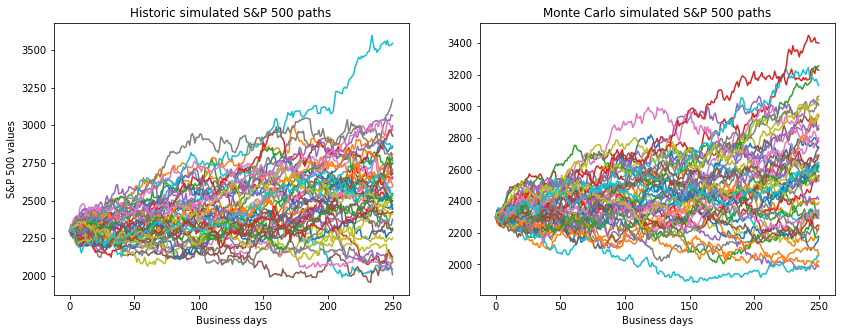

In [10]:
def show_paths(paths, paths_mc, shown=50):
    """ show some simulated paths """
    figsize(14,5)
    subplot(1,2,1)
    for i in range(shown):
        plot(paths[:, i])
    xlabel(ocl.hist_MC_chart_xlabel)
    ylabel(ocl.hist_MC_chart_ylabel)
    title(ocl.hist_chart_title)
    subplot(1,2,2)
    for i in range(shown):
        plot(paths_mc[:, i])
    xlabel(ocl.hist_MC_chart_xlabel)
    ti = title(ocl.MC_chart_title)
    # tight_layout()
    
snp = ocl.SnP500_data()
paths = snp500 * snp.make_hist_returns(n_paths=5000, n_days=250)
paths_mc = snp500 * snp.make_mc_returns(n_paths=5000, n_days=250)
show_paths(paths, paths_mc)

## Distribution of final value

In [11]:
def fin_hist(paths, paths_mc, show_log):
    """ histograms for the final value distribution
    using original or logarithmic scale
    """
    
    # select the last simulated row in both sets
    s_final = paths[-1, :]
    s_mc_final = paths_mc[-1, :]
    
    # set up parameters depending on scale required
    if show_log:
        fr = np.log(s_final)
        se = np.log(s_mc_final)
        wid = 0.035
        xt = 'Log S'
    else:
        fr = s_final
        se = s_mc_final
        wid = 100
        xt = 'S'
    
    # draw histograms
    figsize(14,5)
    subplot(1,2,1)
    hi = hist(fr, width=wid, bins=20)
    xlabel(xt)
    ti = title(ocl.ti_h)
    subplot(1,2,2)
    hi = hist(se, width=wid, bins=20)
    xlabel(xt)
    ti = title(ocl.ti_mc)

### Original scale

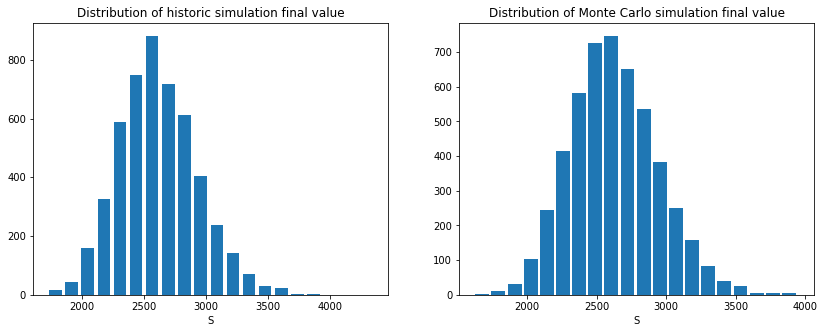

In [12]:
fin_hist(paths, paths_mc, False)

### Logarithmic scale

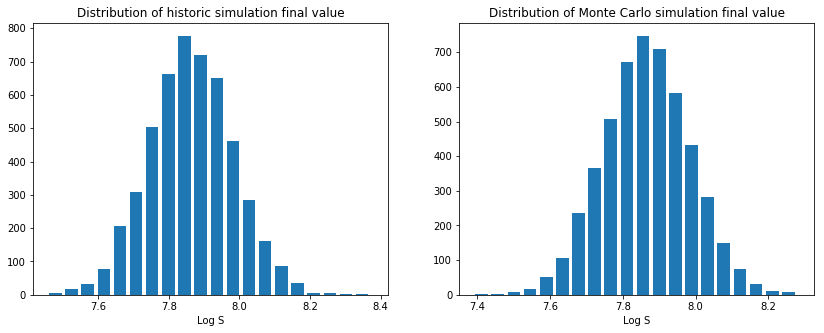

In [13]:
fin_hist(paths, paths_mc, True)

## Annualized historic S&P 500 volatility

      volatility
2008   41.054466
2009   27.285015
2010   18.051750
2011   23.273713
2012   12.716456
2013   11.068820
2014   11.370554
2015   15.493739
2016   13.094963
2017    6.672385


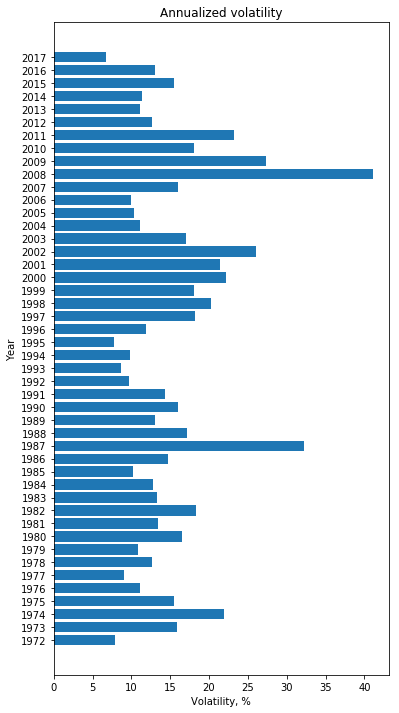

In [14]:
dfv = 100 * snp.annual_vols()
figsize(6,12)
barh(range(dfv.shape[0]), dfv.volatility, tick_label=dfv.index)
title('Annualized volatility')
xlabel('Volatility, %')
ylabel('Year')
print(dfv.tail(10))